# Latest interest rate data from St. Louis Federal reserve 

In [9]:
# import requiered modules
import pandas as pd
msg=!pip install pandas-datareader
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
from numpy import * 
from scipy import stats
from numpy import * 
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
from numpy import * 
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
from IPython.display import display, Markdown, Latex, Math
import ipywidgets as widgets
from matplotlib.pyplot import FuncFormatter
def log_10_product1(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%.1f' % (x)
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    if x < 1 :
        return '%.2f' % (x)
    elif x < 10 :
        return '%.1f' % (x)
    return '%.0f' % (x)
#
def YC(dat):
    sprd=dat.DGS30[0]-dat.DGS1[0]
    if sprd>=3.0:
        yc='Steep'
    elif sprd>=1.0:
        yc='Normal'
    else:
        yc='Flat'
        if sum(dat.iloc[0,4:]>dat.DGS30[0])>=2:
            yc='Inverted'
    return yc,sprd
#

Begin by downloading the latest data automaticaly, The St Louis Fed. keeps data on 30 year,
20 year, 10 year, 5 year, 2year, 1 year, 3 month, and 1 month fixt rate treasury bon interest rates.
The python  pandas data-reader package provides functionality to do this. You can see the requiered code
by expanding the code sections designated by elipsies. The first code section above loads the requiered
libraries and defines subroutines.



In [10]:
start=datetime.datetime.now()-datetime.timedelta(days=30)
end=datetime.datetime.now()
lst=['DGS30','DGS20','DGS10','DGS5','DGS2','DGS1','DGS3MO','DGS1MO']
t  =[30.0,      20.0,   10.0,  5.0,    2.0,   1.0,    0.25,  1/12.0]
src='fred'
dat=pdr.DataReader(lst,src,start,end).tail(1)
print('The most current data from the St. Lois Fed.:')
dat

The most current data from the St. Lois Fed.:


,DGS30,DGS20,DGS10,DGS5,DGS2,DGS1,DGS3MO,DGS1MO
DATE,,,,,,,,
2018-04-17,3.0,2.89,2.82,2.68,2.41,2.16,1.8,1.68


<IPython.core.display.Math object>

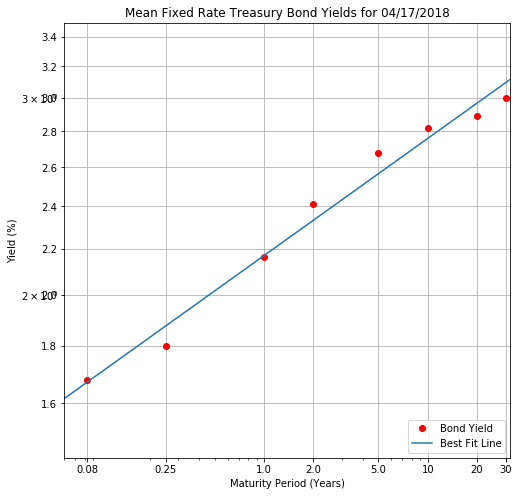

In [11]:
%matplotlib inline
plt.figure(figsize=(8,8))
v=dat.values[0]
yc1=stats.linregress(log(t),log(v))
a,b,r=yc1.slope,yc1.intercept,yc1.rvalue**2
plt.plot(t,v,marker='o',linestyle='',color='red',label='Bond Yield')
t1=linspace(.01,34,200)
ax=plt.plot(t1,exp(b)*power(t1,a),label='Best Fit Line')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
formatter = FuncFormatter(log_10_product)
formatter1= FuncFormatter(log_10_product1)
ax.set_xticks([1.0/12,.25,1,2,5,10,20,30])
ax.xaxis.set_major_formatter(formatter)
ax.set_yticks(arange(.2,20,.2))
ax.yaxis.set_major_formatter(formatter1)
plt.grid()
plt.xlim(.06,32)
plt.ylim(min(v)-.25,max(v)+.5)
plt.ylabel('Yield (%)')
plt.xlabel('Maturity Period (Years)')
plt.legend(loc='lower right')
plt.title('Mean Fixed Rate Treasury Bond Yields for %s' % (dat.index[0].strftime('%m/%d/%Y')))
yc,sprd=YC(dat)
Math('$Yield\ curve\ for\ %s\ is\ %s.\ Spread: %.2f\ \ \ Best\ Fit:\ Yeild=%ft^{%f}\ \ \ R^2=%f$' %\
     (dat.index[0].strftime('%m/%d/%Y'),yc,sprd,exp(b),a,r))

In [12]:
temp=datetime.datetime(end.year,end.month,end.day)
this_month=((temp.replace(day=1),temp+datetime.timedelta(days=1)))
#print(this_month)
dat=pdr.DataReader(lst,src,this_month[0],this_month[1])
tmM=pd.DataFrame(dat.mean()).transpose()
tmM.index=pd.Index([this_month[0].strftime('%B %Y')])
tmM

,DGS30,DGS20,DGS10,DGS5,DGS2,DGS1,DGS3MO,DGS1MO
April 2018,3.02,2.898333,2.798333,2.6275,2.318333,2.095,1.750833,1.6625


<IPython.core.display.Math object>

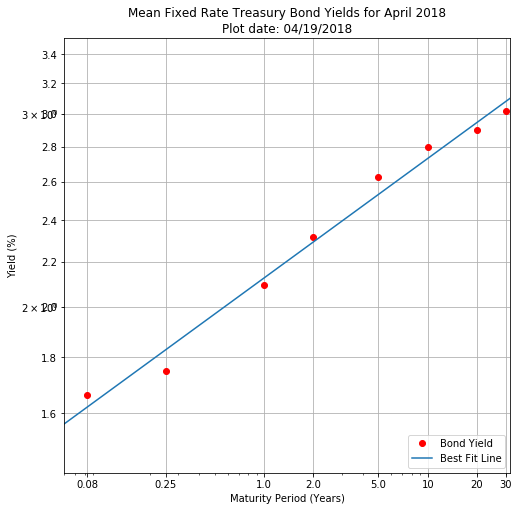

In [13]:
plt.figure(figsize=(8,8))
v=tmM.values[0]
yc1=stats.linregress(log(t),log(v))
a,b,r=yc1.slope,yc1.intercept,yc1.rvalue**2
plt.plot(t,v,marker='o',linestyle='',color='red',label='Bond Yield')
t1=linspace(.01,34,200)
ax=plt.plot(t1,exp(b)*power(t1,a),label='Best Fit Line')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
formatter = FuncFormatter(log_10_product)
formatter1= FuncFormatter(log_10_product1)
ax.set_xticks([1.0/12,.25,1,2,5,10,20,30])
ax.xaxis.set_major_formatter(formatter)
ax.set_yticks(arange(.2,20,.2))
ax.yaxis.set_major_formatter(formatter1)
plt.grid()
plt.xlim(.06,32)
plt.ylim(min(v)-.25,max(v)+.5)
plt.ylabel('Yield (%)')
plt.xlabel('Maturity Period (Years)')
plt.legend(loc='lower right')
plt.title('Mean Fixed Rate Treasury Bond Yields for %s\nPlot date: %s' % (tmM.index[0],end.strftime('%m/%d/%Y')))
yc,sprd=YC(dat)
Math(r'\ \ \ Yield\ curve\ for\ %s\ as\ of\ %s\ is\ %s. Spread: %.2f\ \ \ Best\ Fit:\ Yeild=%ft^{%f}\ \ \ R^2=%f' %\
     (tmM.index[0].replace(' ','\\ '),end.strftime('%m/%d/%Y'),yc,sprd,exp(b),a,r))

In [14]:
temp=datetime.datetime(end.year,end.month,end.day)
last_month=((temp.replace(day=1)-datetime.timedelta(days=1)).replace(day=1),temp.replace(day=1)-datetime.timedelta(days=1))
print(last_month)
dat=pdr.DataReader(lst,src,last_month[0],last_month[1])
lmM=pd.DataFrame(dat.mean()).transpose()
lmM.index=pd.Index([last_month[0].strftime('%B %Y')])
lmM

(datetime.datetime(2018, 3, 1, 0, 0), datetime.datetime(2018, 3, 31, 0, 0))


,DGS30,DGS20,DGS10,DGS5,DGS2,DGS1,DGS3MO,DGS1MO
March 2018,3.091429,2.973333,2.842381,2.629524,2.275714,2.062857,1.726667,1.636667


<IPython.core.display.Math object>

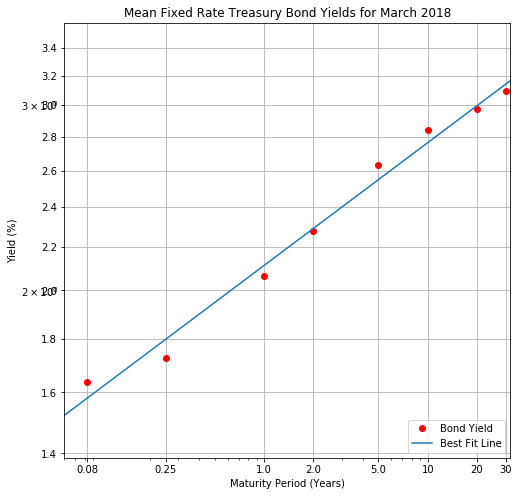

In [15]:
plt.figure(figsize=(8,8))
v=lmM.values[0]
yc1=stats.linregress(log(t),log(v))
a,b,r=yc1.slope,yc1.intercept,yc1.rvalue**2
plt.plot(t,v,marker='o',linestyle='',color='red',label='Bond Yield')
t1=linspace(.01,34,200)
ax=plt.plot(t1,exp(b)*power(t1,a),label='Best Fit Line')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
formatter = FuncFormatter(log_10_product)
formatter1= FuncFormatter(log_10_product1)
ax.set_xticks([1.0/12,.25,1,2,5,10,20,30])
ax.xaxis.set_major_formatter(formatter)
ax.set_yticks(arange(.2,20,.2))
ax.yaxis.set_major_formatter(formatter1)
plt.grid()
plt.xlim(.06,32)
plt.ylim(min(v)-.25,max(v)+.5)
plt.ylabel('Yield (%)')
plt.xlabel('Maturity Period (Years)')
plt.legend(loc='lower right')
plt.title('Mean Fixed Rate Treasury Bond Yields for %s' % (lmM.index[0]))
yc,sprd=YC(dat)
Math(r'\ \ \ Yield\ curve\ for\ %s\ was\ %s. Spread: %.2f\ \ \ Best\ Fit:\ Yeild=%ft^{%f}\ \ \ R^2=%f' %\
     (lmM.index[0].replace(' ','\\ '),yc,sprd,exp(b),a,r))